In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import networkx as nx
from castle.datasets import IIDSimulation, DAG
from matplotlib.colors import ListedColormap
sns.set_style({'font.family':'serif', 'font.size':'10', 'font.serif':['Times New Roman']})
#color_array = np.array([[240,240,240],[189,189,189],[99,99,99]])/255 # gray
color_array = np.array([[102,194,165],[252,141,98],[141,160,203]])/255 # https://colorbrewer2.org/?type=diverging&scheme=RdBu&n=11#type=qualitative&scheme=Set2&n=3
cmap = ListedColormap(color_array)
figures_path = Path("figures")

In [8]:
def full_DAG(top_order):
    d = len(top_order)
    A = np.zeros((d,d))
    for i, var in enumerate(top_order):
        A[var, top_order[i+1:]] = 1
    return A

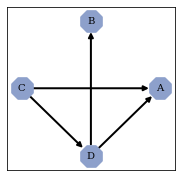

In [9]:
n_nodes, n_edges = 4, 2
random_dag = DAG.scale_free(n_nodes=n_nodes, n_edges=n_edges*n_nodes, seed=2)
dag = nx.from_numpy_matrix(random_dag, create_using=nx.DiGraph)
#adj = nx.to_numpy_matrix(graph)
#A = nx.nx_agraph.to_agraph(dag)
fig = plt.figure(figsize=(3,3))
nodes_name = {0:"A", 1:"B", 2:"C", 3:"D"}
nx.draw_networkx(dag, pos = nx.drawing.layout.circular_layout(dag), #circular_layout
                            node_size = 500, node_shape = '8', node_color = '#8da0cb',
                            arrows=True, linewidths = 2.0, width = 2,
                            with_labels=True, labels = nodes_name, font_family = 'serif', font_size = 10)
#plt.savefig(figures_path / "graph_sample.svg")

In [10]:
order_sort = list(list(nx.topological_sort(dag)))
order_named = list(map(nodes_name.get, order_sort))
order_named, order_sort , full_DAG(order_sort), random_dag

(['C', 'D', 'A', 'B'],
 [2, 3, 0, 1],
 array([[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 0.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 1., 0., 0.]]))

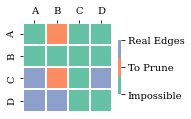

In [11]:
both = pd.DataFrame(full_DAG(order_sort) + random_dag,index=list(nodes_name.values()), columns=list(nodes_name.values()))
fig = plt.figure(figsize=(2,2))
ax = sns.heatmap(both -1 , center=0,
            square=True, linewidths=0.1,cmap= cmap, cbar_kws={"shrink": .5})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, 0, 1])
colorbar.set_ticklabels(['Impossible', 'To Prune', 'Real Edges'])
plt.savefig(figures_path / "adj_after_pruning.svg")